<a href="https://colab.research.google.com/github/Chandramani05/Data-Science-Project-Spotify-API-ANALYSIS/blob/main/NBA_Game_%2C_Stats_and_Players_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [301]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

import datetime as dt

##Getting the Saved CSV file from Scraping

In [302]:
stats_df = pd.read_csv('/content/drive/MyDrive/Machine Learning NBA /allStatsFinal.csv')
games_df = pd.read_csv('/content/drive/MyDrive/Machine Learning NBA /allGamesFinal.csv')
players_df = pd.read_csv('/content/drive/MyDrive/Machine Learning NBA /all_seasons 2.csv')

In [303]:
stats_df = stats_df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis = 1)
games_df = games_df.drop(['Unnamed: 0'], axis = 1)
players_df = players_df.drop(['Unnamed: 0'], axis = 1)
stats_df.info()
games_df.info()
players_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100185 entries, 0 to 100184
Data columns (total 31 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   gameID                        100185 non-null  int64  
 1   statsID                       100185 non-null  int64  
 2   assists                       100185 non-null  int64  
 3   blocks                        100185 non-null  int64  
 4   defensiveRebounds             100185 non-null  int64  
 5   threePointFieldGoalPercent    100185 non-null  float64
 6   threePointFieldGoalAttempted  100185 non-null  int64  
 7   threePointFieldGoal           100185 non-null  int64  
 8   fieldGoalPercent              100185 non-null  float64
 9   fieldGoalAttempt              100185 non-null  int64  
 10  fieldGoalMade                 100185 non-null  int64  
 11  freeThrowPercent              100185 non-null  float64
 12  freeThrowAttempt              100185 non-nul

In [304]:
print(stats_df.head())

   gameID  statsID  assists  blocks  defensiveRebounds  \
0   48815  1159251        1       1                  3   
1   48815  1159254        2       1                  1   
2   48815  1159253        0       1                  1   
3   48815  1159252        0       0                  0   
4   48815  1159255        3       2                  3   

   threePointFieldGoalPercent  threePointFieldGoalAttempted  \
0                        40.0                             5   
1                         0.0                             4   
2                         0.0                             0   
3                         0.0                             0   
4                        42.9                             7   

   threePointFieldGoal  fieldGoalPercent  fieldGoalAttempt  ...  \
0                    2              50.0                 8  ...   
1                    0              33.3                 6  ...   
2                    0              75.0                 4  ...   
3   

In [305]:
games_df.head()

,gameID,date,homeTeamScore,visitorTeamScore,season,period,status,time,postseasonBoolean,homeTeamID,...,homeTeamDivision,homeTeamFullName,homeTeamName,visitorTeamID,visitorTeamAbbrev,visitorTeamCity,visitorTeamConference,visitorTeamDivision,visitorTeamFullName,visitorTeamName
0,27276,2014-11-06T00:00:00.000Z,108,87,2014,4,Final,,False,25,...,Northwest,Portland Trail Blazers,Trail Blazers,7,DAL,Dallas,West,Southwest,Dallas Mavericks,Dallas Mavericks
1,27277,2014-11-07T00:00:00.000Z,122,119,2014,4,Final,,False,4,...,Southeast,Charlotte Hornets,Hornets,1,ATL,Atlanta,East,Southeast,Atlanta Hawks,Atlanta Hawks
2,27278,2014-11-08T00:00:00.000Z,87,98,2014,4,Final,,False,11,...,Southwest,Houston Rockets,Rockets,10,GSW,Golden State,West,Pacific,Golden State Warriors,Golden State Warriors
3,27279,2014-11-09T00:00:00.000Z,116,100,2014,4,Final,,False,25,...,Northwest,Portland Trail Blazers,Trail Blazers,8,DEN,Denver,West,Northwest,Denver Nuggets,Denver Nuggets
4,27280,2014-11-10T00:00:00.000Z,85,89,2014,4,Final,,False,13,...,Pacific,LA Clippers,Clippers,27,SAS,San Antonio,West,Southwest,San Antonio Spurs,San Antonio Spurs


In [306]:
games_df['year'] = games_df['date'].str[:4]
games_df['year'] = pd.to_datetime(games_df['year'], format='%Y-%m-%d').dt.year
games_df.head()

,gameID,date,homeTeamScore,visitorTeamScore,season,period,status,time,postseasonBoolean,homeTeamID,...,homeTeamFullName,homeTeamName,visitorTeamID,visitorTeamAbbrev,visitorTeamCity,visitorTeamConference,visitorTeamDivision,visitorTeamFullName,visitorTeamName,year
0,27276,2014-11-06T00:00:00.000Z,108,87,2014,4,Final,,False,25,...,Portland Trail Blazers,Trail Blazers,7,DAL,Dallas,West,Southwest,Dallas Mavericks,Dallas Mavericks,2014
1,27277,2014-11-07T00:00:00.000Z,122,119,2014,4,Final,,False,4,...,Charlotte Hornets,Hornets,1,ATL,Atlanta,East,Southeast,Atlanta Hawks,Atlanta Hawks,2014
2,27278,2014-11-08T00:00:00.000Z,87,98,2014,4,Final,,False,11,...,Houston Rockets,Rockets,10,GSW,Golden State,West,Pacific,Golden State Warriors,Golden State Warriors,2014
3,27279,2014-11-09T00:00:00.000Z,116,100,2014,4,Final,,False,25,...,Portland Trail Blazers,Trail Blazers,8,DEN,Denver,West,Northwest,Denver Nuggets,Denver Nuggets,2014
4,27280,2014-11-10T00:00:00.000Z,85,89,2014,4,Final,,False,13,...,LA Clippers,Clippers,27,SAS,San Antonio,West,Southwest,San Antonio Spurs,San Antonio Spurs,2014


###Home Win Percentage over the years

In [307]:
import warnings
warnings.filterwarnings("ignore")


Text(0.5, 0, 'Year')

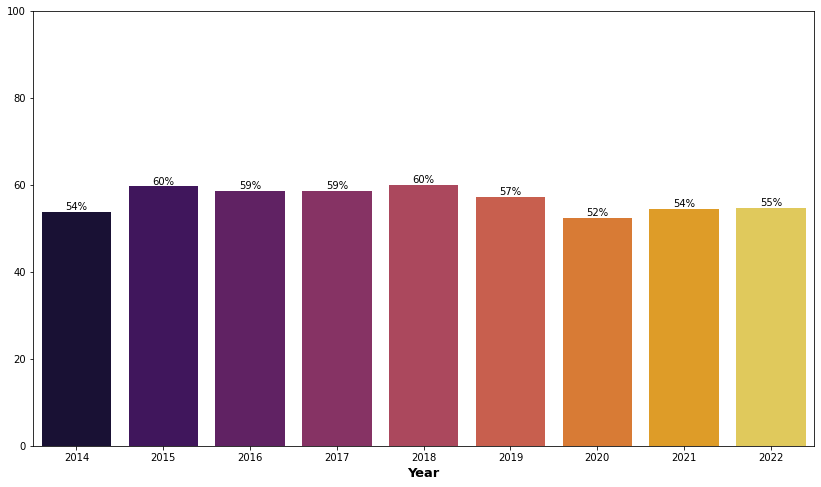

In [308]:
home_win = games_df[['gameID','homeTeamScore','visitorTeamScore','year']]
home_win['winner'] = games_df.apply(lambda row: 1 if row.homeTeamScore > row.visitorTeamScore else 0, axis=1)
y1 = home_win.groupby('year')['gameID'].nunique()
y = (home_win.groupby('year')['winner'].sum() / y1)*100
ax = plt.figure(figsize = (14,8))

ax  = sns.barplot(y.index, y.values, palette = 'inferno')
ax.bar_label(ax.containers[0], fmt='%.f%%')
ax.set(ylim=(0, 100))
ax.set_xticklabels(y.index)
ax.set_xlabel("Year", fontdict = {'weight' : 'bold', 'size' : 13})



##Average No of total baskets (goal) over the Year

Text(0.5, 0, 'Year')

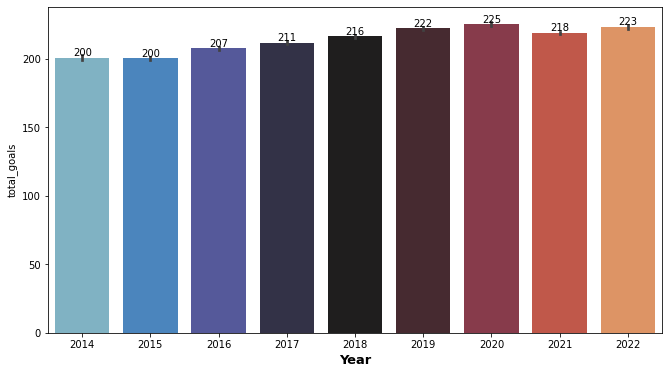

In [309]:
home_win['total_goals'] = (home_win['homeTeamScore'] + home_win['visitorTeamScore'])
ax1 = plt.figure(figsize = (11,6))
ax1 = sns.barplot(x = 'year', y = 'total_goals', data = home_win, palette = 'icefire')
ax1.bar_label(ax1.containers[0], fmt = '%d')
ax1.set_xlabel("Year", fontdict = {'weight' : 'bold', 'size' : 13})

##Goal Score % (Free Throw, 3 pointers and Field Goals) Over the Years

In [310]:
goal_df = pd.merge(home_win, stats_df, on="gameID")
goal_df['year']

0         2019
1         2019
2         2019
3         2019
4         2019
          ... 
100180    2021
100181    2021
100182    2021
100183    2021
100184    2021
Name: year, Length: 100185, dtype: int64

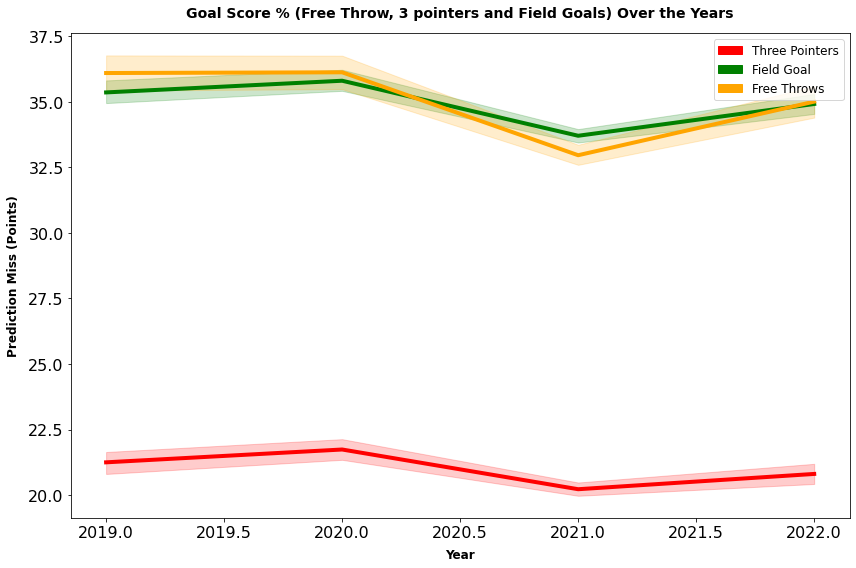

In [311]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(data=goal_df, x='year', y='threePointFieldGoalPercent', ax=ax, color='r', linewidth=4)
sns.lineplot(data=goal_df, x='year', y='fieldGoalPercent', ax=ax, color='g', linewidth=4)
sns.lineplot(data=goal_df, x='year', y='freeThrowPercent', ax=ax, color='orange', linewidth=4)

ax.set_title('Goal Score % (Free Throw, 3 pointers and Field Goals) Over the Years', fontsize=14, pad=16, fontweight='bold')
ax.set_xlabel('Year', fontsize=12, labelpad=8, fontweight='bold')
ax.set_ylabel('Prediction Miss (Points)', fontsize=12, labelpad=8, fontweight='bold')

red_patch = mpatches.Patch(color='r', label='Three Pointers')
green_patch = mpatches.Patch(color='g', label='Field Goal')
orange_patch = mpatches.Patch(color='orange', label='Free Throws')
ax.legend(handles=[red_patch, green_patch, orange_patch], fontsize='large')

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()

#NBA Players - Change Through the Years

In [312]:
players_df['drafted'] = np.where(players_df['draft_year'] != 'Undrafted', 1, 0)
players_df['draft_year'] = players_df['draft_year'].replace(r'Undrafted', np.nan, regex=True)

#convert datetime
players_df['draft_year'] = pd.to_datetime(players_df['draft_year'])
players_df['season'] = pd.to_datetime(players_df['season'].str[:4])

#add positions
players_df['position'] = 'NA'
players_df['position'][players_df['player_height'] >= 207] = 'Center'
players_df['position'][players_df['player_height'] <= 195] = 'Guard'
players_df['position'][(players_df.player_height > 195)&(players_df.player_height < 207 )] = 'Forward'



In [313]:
players_df

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,drafted,position
0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986-01-01,2,27,...,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-01-01,1,Forward
1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990-01-01,1,24,...,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-01-01,1,Center
2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979-01-01,3,58,...,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-01-01,1,Forward
3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995-01-01,1,9,...,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-01-01,1,Forward
4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985-01-01,1,10,...,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-01-01,1,Forward
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12300,Markieff Morris,MIA,32.0,205.74,111.130040,Kansas,USA,2011-01-01,1,13,...,1.4,4.5,0.059,0.089,0.197,0.547,0.116,2021-01-01,1,Forward
12301,Markelle Fultz,ORL,24.0,193.04,94.800728,Washington,USA,2017-01-01,1,1,...,5.5,-5.3,0.010,0.116,0.265,0.517,0.448,2021-01-01,1,Guard
12302,Marcus Smart,BOS,28.0,193.04,99.790240,Oklahoma State,USA,2014-01-01,1,6,...,5.9,9.3,0.018,0.093,0.179,0.540,0.245,2021-01-01,1,Guard
12303,Marcus Garrett,MIA,23.0,195.58,92.986360,Kansas,USA,NaT,Undrafted,Undrafted,...,0.6,5.8,0.072,0.108,0.086,0.280,0.069,2021-01-01,0,Forward


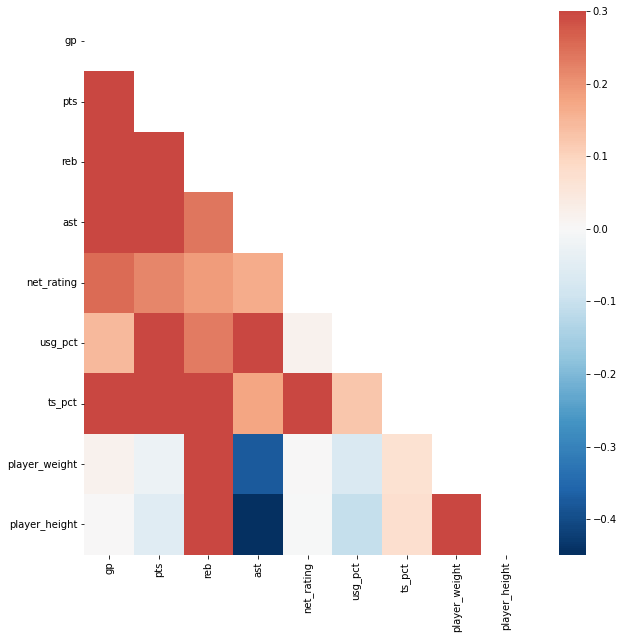

In [314]:
player_corr = players_df[["gp","pts","reb","ast","net_rating","usg_pct","ts_pct","player_weight","player_height"]]

corr = player_corr.corr()

mask = np.triu(np.ones_like(corr, dtype=np.bool))

f, ax = plt.subplots(figsize=(10, 10))


sns.heatmap(corr, mask=mask, vmax=.3, center=0, cmap = "RdBu_r")

plt.show()

This shows that big man have advantage of rebound, but players' size affects usg_pct and ast as negative.

##Physical Aspects

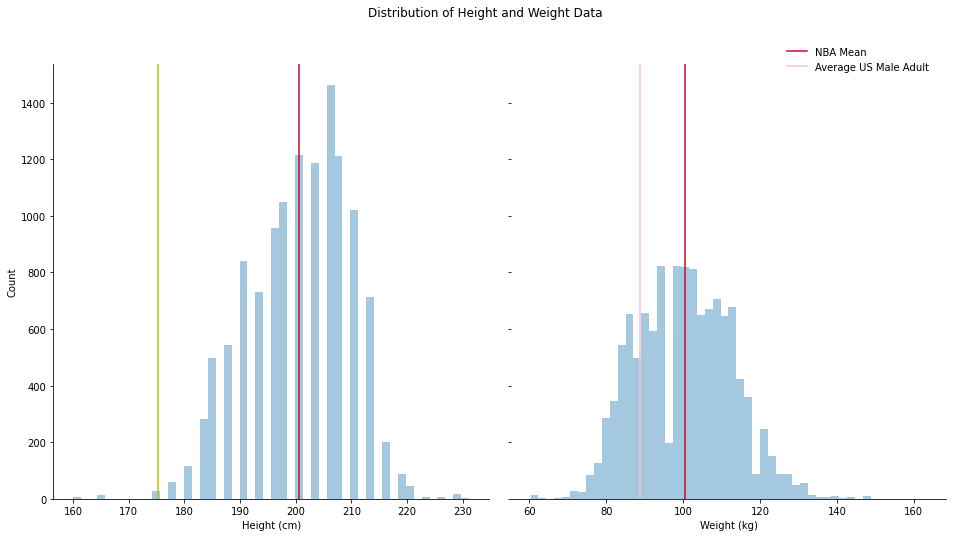

In [315]:
fig, ax = plt.subplots(1,2,figsize=(16, 8),sharey=True)
plt.subplots_adjust(wspace=0.05)

sns.distplot(players_df ['player_height'], ax=ax[0], label='_nolegend_', kde=False)
sns.distplot(players_df ['player_weight'], ax=ax[1], label='_nolegend_', kde=False)
ax[0].axvline(players_df ['player_height'].mean(), color='#c9082a', label='NBA Mean')
ax[1].axvline(players_df ['player_weight'].mean(), color='#c9082a', label='NBA Mean')

# Add lines for average adults to compare
ax[0].axvline(175.3, color='y', label='Average US Male Adult')
ax[1].axvline(88.8, color='pink', label='Average US Male Adult')

ax[0].yaxis.set_label_text('Count')
ax[0].xaxis.set_label_text('Height (cm)')
ax[1].xaxis.set_label_text('Weight (kg)')
plt.suptitle('Distribution of Height and Weight Data', fontdict = {'weight' : 'bold', 'size' : '18'})
plt.legend(loc='upper right', bbox_to_anchor=(0.98, 1.06), frameon=False)
sns.despine(ax=ax[1], left=True)
sns.despine(ax=ax[0])

plt.show()


The average height and weight of a NBA player show a declining trend through different eras. This shows that players are getting more athletic and trying to add different skills to their resume, this leads to teams trying to utilize one player in multiple positions, making it the team tougher to defend.

##Average Height and Weight Each Season

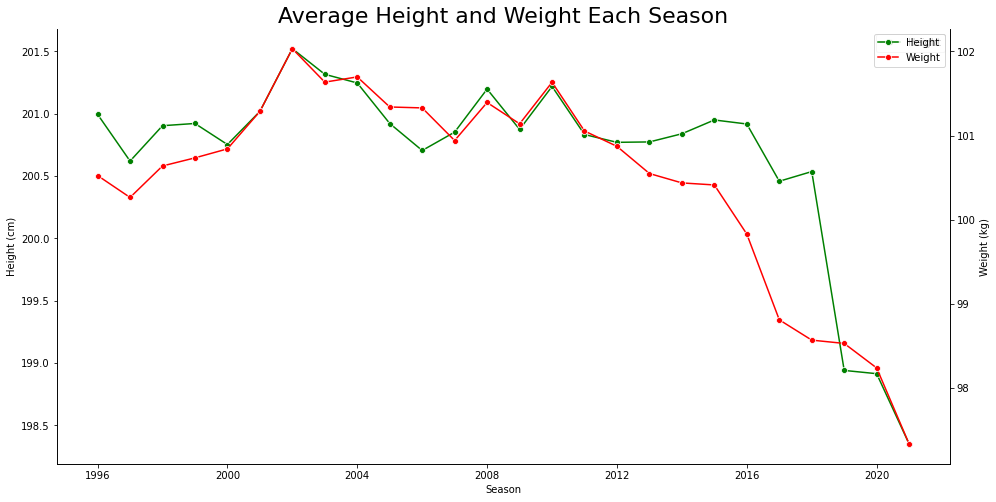

In [316]:
fig, ax = plt.subplots(figsize=(16, 8))
ax2 = ax.twinx()

sns.lineplot(x=players_df['season'], y='player_height', data=players_df, marker="o", ax=ax, ci=None, label='Height', color='green')
sns.lineplot(x=players_df['season'], y='player_weight', data=players_df, marker="o", ax=ax2, ci=None, label='Weight', color='red')

plt.title('Average Height and Weight Each Season', fontsize=22)
ax.xaxis.set_label_text('Season')
ax.yaxis.set_label_text('Height (cm)')
ax2.yaxis.set_label_text('Weight (kg)')

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

ax.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)

plt.show()

##Position Wise Analysis

###Center Position

In [317]:
center_df = players_df[players_df.position == 'Center']
center_df.head()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,drafted,position
1,Dwayne Schintzius,LAC,28.0,215.90,117.93392,Florida,USA,1990-01-01,1,24,...,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-01-01,1,Center
7,Elden Campbell,LAL,28.0,213.36,113.39800,Clemson,USA,1990-01-01,1,27,...,1.6,3.3,0.095,0.183,0.222,0.520,0.087,1996-01-01,1,Center
11,Elmore Spencer,SEA,27.0,213.36,122.46984,Nevada-Las Vegas,USA,1992-01-01,1,25,...,0.0,-147.5,0.000,0.000,0.126,0.000,0.000,1996-01-01,1,Center
14,Eric Leckner,VAN,31.0,210.82,120.20188,Wyoming,USA,1988-01-01,1,17,...,0.3,-3.9,0.044,0.258,0.175,0.444,0.067,1996-01-01,1,Center
15,Eric Mobley,VAN,27.0,210.82,106.59412,Pittsburgh,USA,1994-01-01,1,18,...,0.5,-15.4,0.106,0.102,0.158,0.472,0.076,1996-01-01,1,Center


###Guard Position

In [318]:
guard_df = players_df[players_df.position == 'Guard']
guard_df.head()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,drafted,position
8,Eldridge Recasner,ATL,29.0,193.04,86.182480,Washington,USA,1992-01-01,Undrafted,Undrafted,...,1.3,-0.3,0.036,0.076,0.172,0.539,0.141,1996-01-01,1,Guard
9,Elliot Perry,MIL,28.0,182.88,72.574720,Memphis,USA,1991-01-01,2,37,...,3.0,-1.2,0.018,0.081,0.177,0.557,0.262,1996-01-01,1,Guard
10,Elmer Bennett,DEN,27.0,182.88,77.110640,Notre Dame,USA,1992-01-01,2,38,...,1.2,-7.4,0.000,0.053,0.187,0.470,0.216,1996-01-01,1,Guard
13,Ennis Whatley,POR,34.0,190.50,80.285784,Alabama,USA,1983-01-01,1,13,...,1.0,-57.4,0.000,0.150,0.115,0.500,0.375,1996-01-01,1,Guard
17,Eric Murdock,DEN,29.0,185.42,86.182480,Providence,USA,1991-01-01,1,21,...,2.0,-1.4,0.010,0.102,0.188,0.588,0.436,1996-01-01,1,Guard


##Forward Position

In [319]:
forward_df = players_df[players_df.position == 'Forward']
forward_df.head()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,drafted,position
0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986-01-01,2,27,...,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-01-01,1,Forward
2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979-01-01,3,58,...,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-01-01,1,Forward
3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995-01-01,1,9,...,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-01-01,1,Forward
4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985-01-01,1,10,...,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-01-01,1,Forward
5,Eddie Johnson,HOU,38.0,200.66,97.522280,Illinois,USA,1981-01-01,2,29,...,1.0,4.1,0.034,0.126,0.220,0.541,0.102,1996-01-01,1,Forward


##Analysis of Points Scored by Guard , Center and Forward Varying over the Season

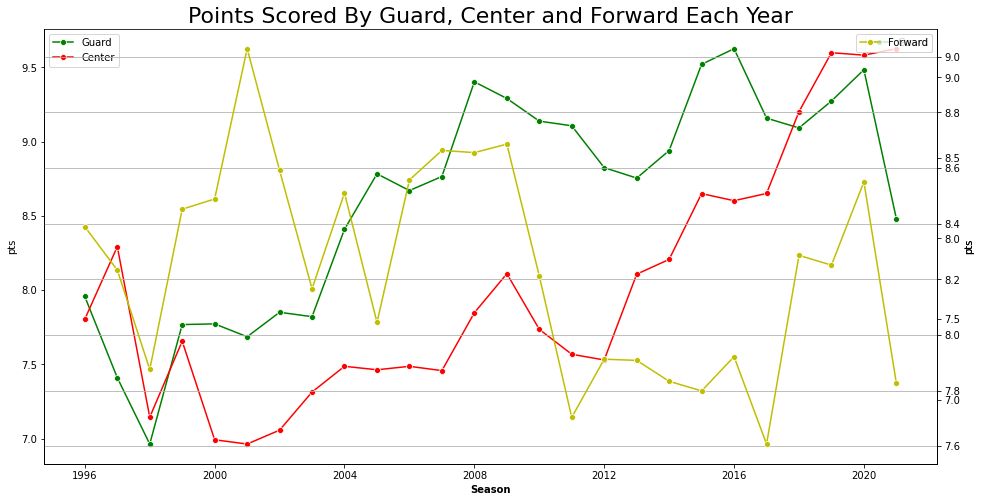

In [320]:
fig, ax = plt.subplots(figsize=(16, 8))
ax2 = ax.twinx()
ax3 = ax.twinx()

sns.lineplot(x=guard_df['season'], y='pts', data=guard_df, marker="o", 
             ax=ax, ci=None, label='Guard', color='green')
sns.lineplot(x=center_df['season'], y='pts', data=center_df, marker="o", 
             ax=ax2, ci=None, label='Center', color='red')
sns.lineplot(x=forward_df['season'], y='pts', data=forward_df, marker="o", 
             ax=ax3, ci=None, label='Forward', color='y')

plt.title('Points Scored By Guard, Center and Forward Each Year', fontsize=22)
ax.xaxis.set_label_text('Season', fontweight = 'bold')

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

ax.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)
plt.grid()
plt.show()

**Analysis**

1. *Forward* : This trend shows that the forwards are improving their scoring through the years, players like Lebron James and Kevin Durant are examples of high scoring forwards.

2. **Guards**: Teams are relying more on the guards to score, this could be due their ability to shoot 3 pointers or ability to get to the rim for the layup or the dunk.

##Analysis of Assists by Guard, Center and Forward Varying over the Season

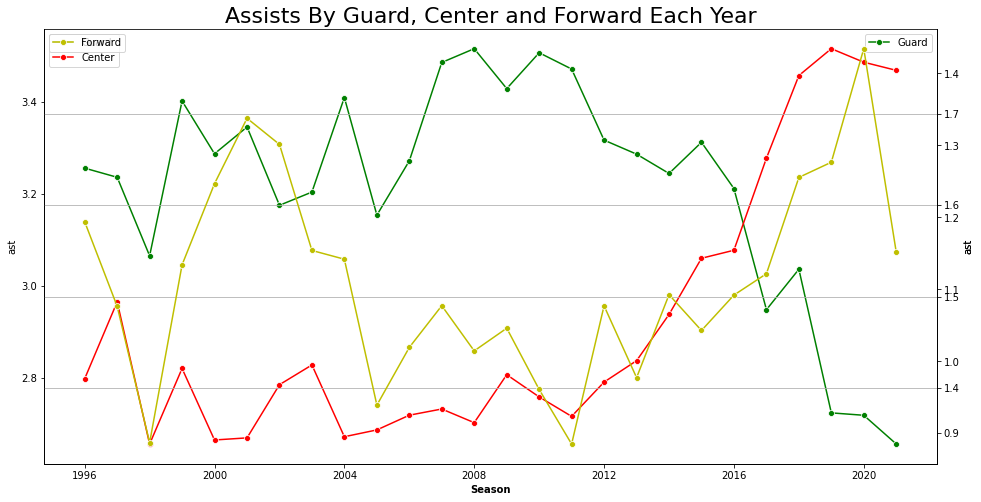

In [321]:
fig, ax = plt.subplots(figsize=(16, 8))
ax2 = ax.twinx()
ax3 = ax.twinx()

sns.lineplot(x=guard_df['season'], y='ast', data=guard_df, marker="o", 
             ax=ax, ci=None, label='Guard', color='green')
sns.lineplot(x=center_df['season'], y='ast', data=center_df, marker="o", 
             ax=ax2, ci=None, label='Center', color='red')
sns.lineplot(x=forward_df['season'], y='ast', data=forward_df, marker="o", 
             ax=ax3, ci=None, label='Forward', color='y')

plt.title('Assists By Guard, Center and Forward Each Year', fontsize=22)
ax.xaxis.set_label_text('Season', fontweight = 'bold')

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

ax.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)
plt.grid()
plt.show()

**Analysis**

1. *Guards*: With emergence of point guards like Steph Curry, Damian Lillard and the legendary shooting guard Kobe Bryant(RIP), guards are more focused on scoring rather than passing.

2. *Forward* : This corresponds to the trend that guards are scoring more points. The forwards are grabbing rebounds and passing it to guards to score..

3. *Center* : This graph easily illustrated change of nba's trend, too. Diminishing of Big man affects Game Style directly. Nba basketball became more skillfull recently.

##Analysis of Rebounds by Guard, Center and Forward Varying over the Season

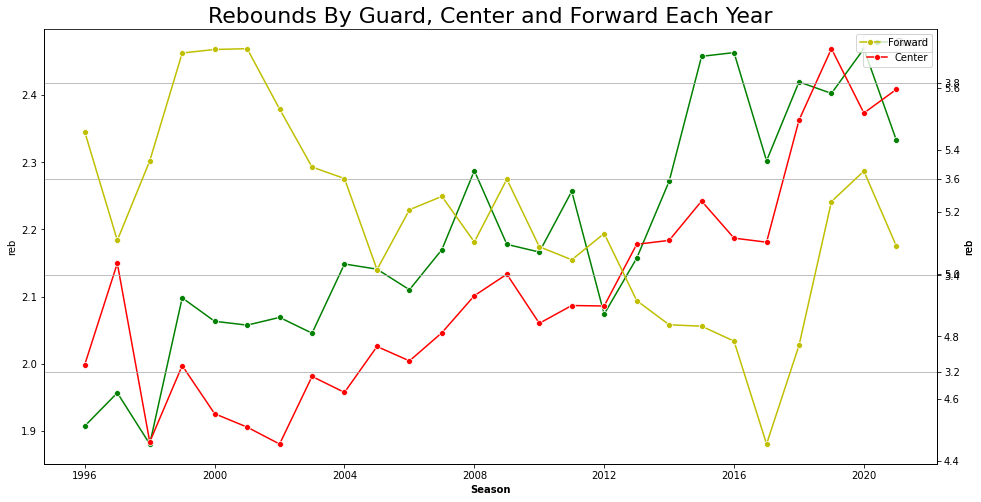

In [322]:
fig, ax = plt.subplots(figsize=(16, 8))
ax2 = ax.twinx()
ax3 = ax.twinx()

sns.lineplot(x=guard_df['season'], y='reb', data=guard_df, marker="o", 
             ax=ax, ci=None, label='Guard', color='green')
sns.lineplot(x=center_df['season'], y='reb', data=center_df, marker="o", 
             ax=ax2, ci=None, label='Center', color='red')
sns.lineplot(x=forward_df['season'], y='reb', data=forward_df, marker="o", 
             ax=ax3, ci=None, label='Forward', color='y')

plt.title('Rebounds By Guard, Center and Forward Each Year', fontsize=22)
ax.xaxis.set_label_text('Season', fontweight = 'bold')

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

ax.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)
plt.grid()
plt.show()

**Analysis**

1. *Center* : Even though the Center players take the most number of rebounds currenly, there is a steep decline in the number if we compare the past years.

2. *Guards*: Guards are increasingly crashing the boards. This could be due to the fact that they are becoming more physically strong and secondly less usage of Centers.

3. *Forward* : his increasing trend corresponds to the less usage of centers, as after them Forwards are the tallest on the court.



##Shooting Efficiency of each positon analysis over each season

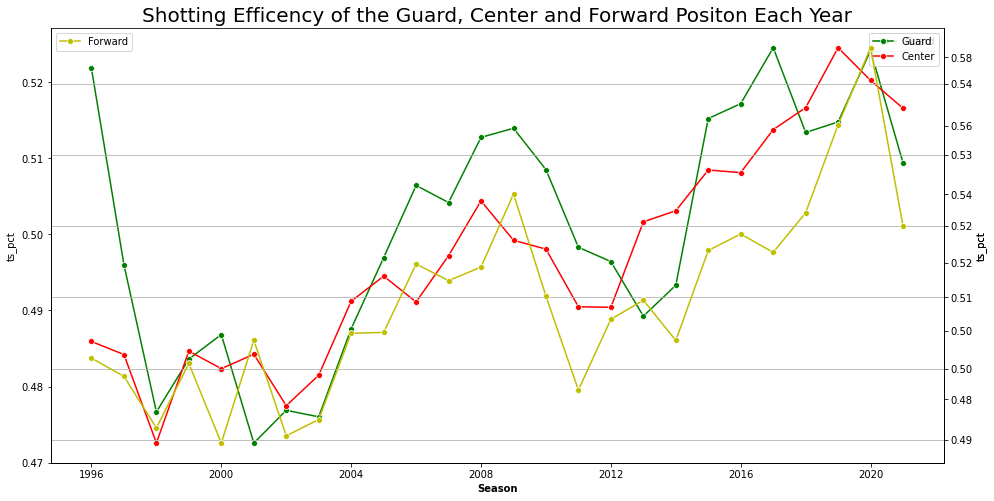

In [323]:
fig, ax = plt.subplots(figsize=(16, 8))
ax2 = ax.twinx()
ax3 = ax.twinx()

sns.lineplot(x=guard_df['season'], y='ts_pct', data=guard_df, marker="o", 
             ax=ax, ci=None, label='Guard', color='green')
sns.lineplot(x=center_df['season'], y='ts_pct', data=center_df, marker="o", 
             ax=ax2, ci=None, label='Center', color='red')
sns.lineplot(x=forward_df['season'], y='ts_pct', data=forward_df, marker="o", 
             ax=ax3, ci=None, label='Forward', color='y')

plt.title('Shotting Efficency of the Guard, Center and Forward Positon Each Year', fontsize=20)
ax.xaxis.set_label_text('Season', fontweight = 'bold')

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

ax.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)
plt.grid()
plt.show()

Even though the use of Centers is diminishing, their shooting efficiency is higher. This could be due to the fact that most of the points Centers score are mostly dunks or high percentage shots in the paint

#Draft Picks

##Team with highest no of lottery pciks

In [324]:
players_df['draft_year']

0       1986-01-01
1       1990-01-01
2       1979-01-01
3       1995-01-01
4       1985-01-01
           ...    
12300   2011-01-01
12301   2017-01-01
12302   2014-01-01
12303          NaT
12304          NaT
Name: draft_year, Length: 12305, dtype: datetime64[ns]

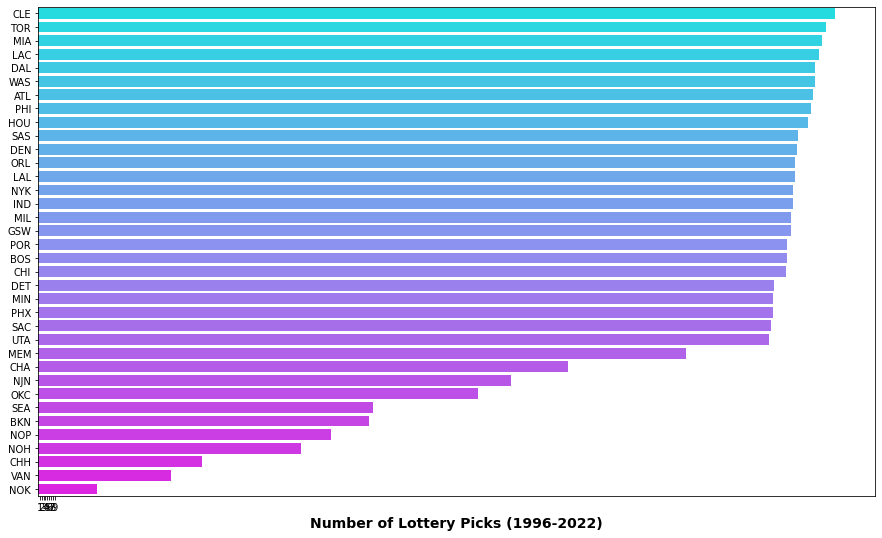

In [325]:
team_lottery_picks = players_df['team_abbreviation'].value_counts()

plt.figure(figsize=(15,9))

sns.barplot(team_lottery_picks, team_lottery_picks.index, palette= 'cool')

plt.xlabel('Number of Lottery Picks (1996-2022)', fontdict = {'weight' : 'bold', 'size' : '14'} )
plt.xticks([i for i in range(1,10)])

plt.show()

The Chicago Bulls lead the pack with a whopping 9 lottery picks in the span of 25 years, followed by the Minnesota Timberwolves  and Memphis Grizzlies.

##First Round Picks

In [326]:
first_round_picks = players_df[players_df.draft_round == '1']

countries = first_round_picks.country.unique()

print('\033[1m' + 'NBA First Round Picks Nationalities' + '\033[0m')
print()

for i in range(len(countries)):
    print(f'{countries[i]: <35}', end='')
    if (i+1) % 3 == 0:
        print()

NBA First Round Picks Nationalities

USA                                Congo                              Nigeria                            
Lithuania                          Canada                             Ukraine                            
Serbia and Montenegro              Jamaica                            US Virgin Islands                  
France                             St. Vincent & Grenadines           Georgia                            
Slovenia                           Dominican Republic                 Germany                            
Turkey                             Greece                             Croatia                            
Senegal                            Spain                              Serbia                             
Haiti                              Russia                             Czech Republic                     
China                              Brazil                             Montenegro                         
Latvia   

In [327]:
non_usa = list(countries)[1:]

usa_or_other = first_round_picks['country'].replace(non_usa, 'Other')

first_round_picks.loc[:,'country'] = usa_or_other

first_round_picks.head()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,drafted,position
1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990-01-01,1,24,...,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-01-01,1,Center
3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995-01-01,1,9,...,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-01-01,1,Forward
4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985-01-01,1,10,...,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-01-01,1,Forward
6,Eddie Jones,LAL,25.0,198.12,86.182480,Temple,USA,1994-01-01,1,10,...,3.4,4.1,0.035,0.091,0.209,0.559,0.149,1996-01-01,1,Forward
7,Elden Campbell,LAL,28.0,213.36,113.398000,Clemson,USA,1990-01-01,1,27,...,1.6,3.3,0.095,0.183,0.222,0.520,0.087,1996-01-01,1,Center


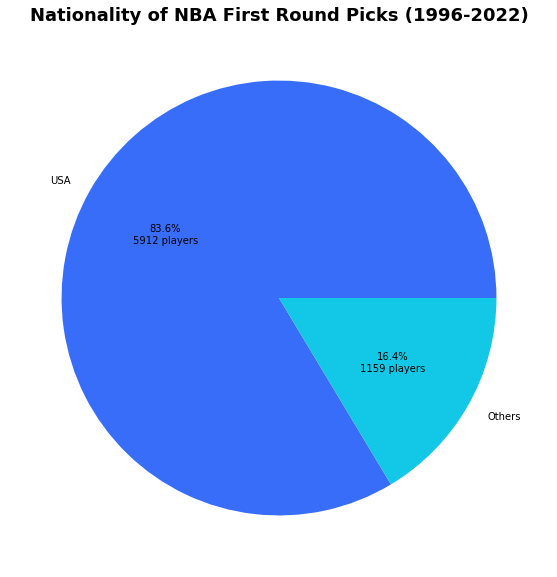

In [328]:
plt.figure(figsize = (15,10))

def make_label(pct, allvalues):
    actual = round(pct/100 * np.sum(allvalues))
    return f"{pct:.1f}%\n{actual} players"
palette_color = sns.color_palette('rainbow')
plt.pie(usa_or_other.value_counts(), labels= ['USA', 'Others'],colors = palette_color,
        autopct= lambda pct: make_label(pct, usa_or_other.value_counts()))

plt.title('Nationality of NBA First Round Picks (1996-2022)', fontsize=18, fontweight = 'bold')

plt.show()

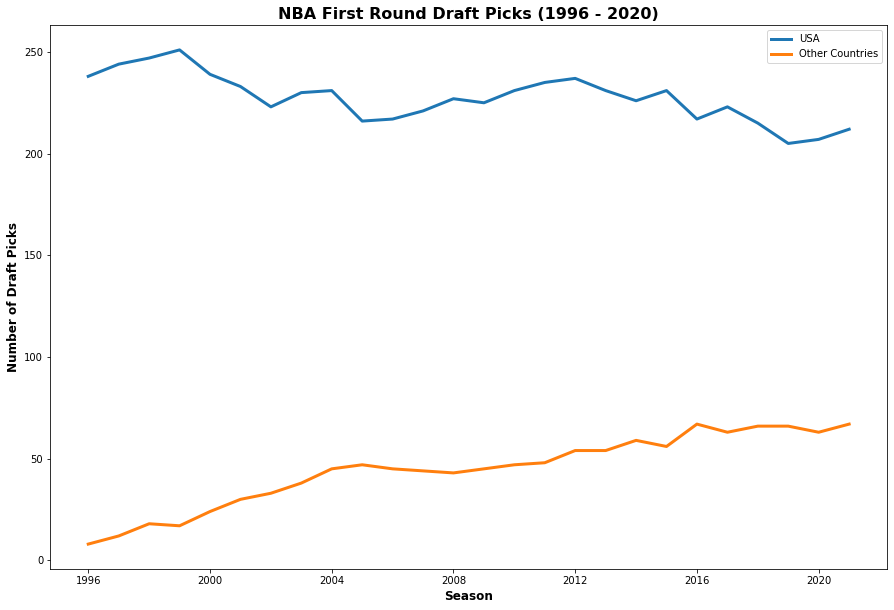

In [329]:
first_round_picks_over_years = pd.crosstab(first_round_picks['season'], first_round_picks['country'])

plt.figure(figsize=(15,10))

plt.plot(first_round_picks_over_years['USA'], label='USA',linewidth=3)
plt.plot(first_round_picks_over_years['Other'], label='Other Countries', linewidth=3)

plt.title('NBA First Round Draft Picks (1996 - 2020)', fontdict = {'weight' : 'bold', 'size' : '16'})
plt.xlabel('Season', fontdict = {'weight' : 'bold', 'size' : '12'})
plt.ylabel('Number of Draft Picks', fontdict = {'weight' : 'bold', 'size' : '12'})
plt.legend()

#Individual Player Analysis

##Points-per-game Distribution

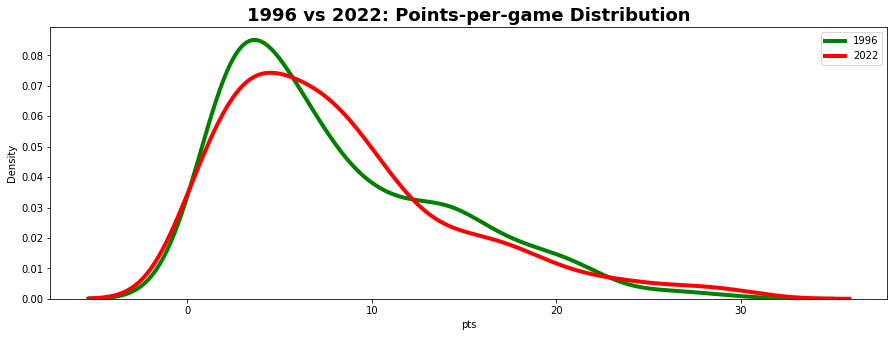

In [330]:
plt.figure(figsize=(15,5))

seasons = list(players_df['season'].unique())
earliest_season = seasons[0]
latest_season = seasons[-1]

sns.kdeplot(players_df[players_df['season'] == earliest_season]['pts'], color='g', label='1996', linewidth=4)
sns.kdeplot(players_df[players_df['season'] == latest_season]['pts'], color='r', label='2022', linewidth= 4)

plt.title("1996 vs 2022: Points-per-game Distribution", fontdict= {'size' : '18', 'weight' : 'bold'})
    
plt.legend()

Most players nowadays have a higher point-per-game average than players back in 1996. Also, averaging 25+ points per game used to be rare, but nowadays, its nothing new to the NBA enthusiast.

##Scoring Leaders

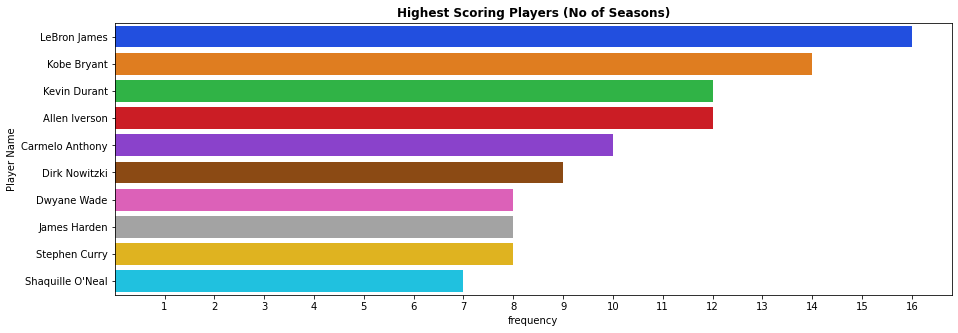

In [335]:
scoring_leader_per_season = players_df.groupby('season')['pts'].nlargest(10).reset_index()

top_scorers = players_df.iloc[scoring_leader_per_season['level_1']].player_name.value_counts().reset_index()

top_scorers = top_scorers[:10]

top_scorers.rename(columns={'index':'player_name', 'player_name':'frequency'}, inplace=True)
plt.figure(figsize=(15,5))
sns.barplot(x='frequency', y='player_name', data=top_scorers, palette = 'bright')

plt.xticks([i+1 for i in range(max(top_scorers['frequency']))])
plt.ylabel('Player Name')
plt.title("Highest Scoring Players (No of Seasons)", fontdict = {'weight' : 'bold' ,'size' : '12'})

plt.show()